In [141]:
import glob
import re
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from pywt import wavedec
import pywt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import scipy.integrate as integrate
from statsmodels.tsa.ar_model import AutoReg
from pylab import figure,clf,plot,xlabel,ylabel,title,grid,axes,show
from scipy.signal import find_peaks
import scipy.signal
import pickle

In [2]:
# Dataset Classes:
# ________________

# Yukari-->Up
# Asagi-->Down
# Sag-->Right 
# Sol-->Left
# Kirp-->Blink 
# Center ????
# what h and v reprenets ??? 


In [3]:
# Define the class labels
class_labels = {
    'yukari': 1,
    'asagi': 2,
    'sag': 3,
    'sol': 4,
    'kirp': 5
}

In [4]:
 h=[]
classes=class_labels.keys()

In [5]:
classes

dict_keys(['yukari', 'asagi', 'sag', 'sol', 'kirp'])

In [6]:
names= np.arange(0,503)

In [7]:
df = pd.read_csv('Data Handling Concat.csv', names=names)

In [8]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,493,494,495,496,497,498,499,500,501,502
0,123,122,127,130,123,123,127,128,125,125,...,143,139,143,141,139,138,142,136,137,1
1,120,132,120,127,126,125,120,125,122,118,...,143,140,139,144,142,139,139,143,134,1
2,136,130,141,136,137,135,144,133,143,144,...,143,141,148,148,144,149,147,150,150,1
3,148,150,139,144,144,144,139,148,142,146,...,135,128,131,132,132,131,133,135,136,1
4,118,112,121,120,116,115,119,116,118,115,...,143,138,135,144,133,133,137,140,95,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 503 entries, 0 to 502
dtypes: int64(503)
memory usage: 393.1 KB


# Preprocessing

In [10]:
x=df.iloc[:,:-1]

In [11]:
x

,0,1,2,3,4,5,6,7,8,9,...,492,493,494,495,496,497,498,499,500,501
0,123,122,127,130,123,123,127,128,125,125,...,149,143,139,143,141,139,138,142,136,137
1,120,132,120,127,126,125,120,125,122,118,...,135,143,140,139,144,142,139,139,143,134
2,136,130,141,136,137,135,144,133,143,144,...,152,143,141,148,148,144,149,147,150,150
3,148,150,139,144,144,144,139,148,142,146,...,135,135,128,131,132,132,131,133,135,136
4,118,112,121,120,116,115,119,116,118,115,...,136,143,138,135,144,133,133,137,140,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,120,129,126,123,127,127,124,126,127,131,...,148,150,156,151,152,152,153,151,154,125
96,130,129,135,123,131,130,129,124,130,127,...,130,128,129,133,132,127,136,132,128,144
97,126,131,129,130,130,131,130,129,131,126,...,141,146,135,142,142,140,141,146,144,183
98,127,119,125,125,126,126,121,127,129,121,...,125,135,131,129,128,132,132,126,133,153


In [12]:
y=df.iloc[:,-1:]

In [13]:
y

,502
0,1
1,1
2,1
3,1
4,1
...,...
95,0
96,0
97,0
98,0


# prepare X

In [14]:
x=np.array(x)
x

array([[123, 122, 127, ..., 142, 136, 137],
       [120, 132, 120, ..., 139, 143, 134],
       [136, 130, 141, ..., 147, 150, 150],
       ...,
       [126, 131, 129, ..., 146, 144, 183],
       [127, 119, 125, ..., 126, 133, 153],
       [129, 122, 130, ..., 138, 142, 144]], dtype=int64)

# psd

In [15]:
psd=[]
for i in x:
    
    (f,s)=scipy.signal.periodogram(i,176,scaling='density')
    psd.append(s)

In [16]:
psd

[array([7.00003339e-31, 1.80326182e+01, 1.25615371e+02, 2.53381864e+01,
        1.49379438e+01, 6.15886704e+00, 6.87106739e+01, 4.60159012e+00,
        1.67896178e+01, 5.07288951e+00, 3.38780849e+01, 8.22628628e-01,
        1.31409773e+01, 2.85629240e+00, 1.30767852e+01, 5.84382605e-01,
        7.45608935e+00, 7.23686863e-01, 4.92262564e+00, 9.59686632e-01,
        1.71377381e+00, 6.75480025e-01, 6.95304031e-01, 8.19704178e-01,
        4.83413134e-01, 4.61851844e-02, 4.05319028e-02, 2.54320309e-01,
        1.40873887e+00, 9.06049304e-02, 1.61142099e-01, 2.31015930e-01,
        1.23045331e+00, 7.22754269e-02, 7.07439313e-01, 1.97762898e-01,
        3.31889831e-01, 1.45577148e-01, 1.34754418e+00, 1.53605841e-01,
        2.48248476e-01, 7.79484187e-01, 2.00394376e-01, 2.61767453e-02,
        5.15928266e-02, 1.90345733e-01, 3.93557505e-01, 4.02610641e-02,
        7.89933559e-02, 7.10552418e-02, 3.06797032e-01, 1.40383232e-02,
        2.71345848e-01, 5.22544566e-02, 9.56474696e-02, 2.823482

In [17]:
X_train, X_test, y_train, y_test = train_test_split(psd, y, test_size=0.20, random_state=40,stratify = y)

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
print(X_train.shape)
print(X_test.shape)

(80, 252)
(20, 252)


In [21]:
y.value_counts()

502
0      20
1      20
2      20
3      20
4      20
dtype: int64

In [22]:
y_train.value_counts()

502
0      16
1      16
2      16
3      16
4      16
dtype: int64

In [23]:
from matplotlib import pyplot as plt

def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.title('feature importances')
    plt.show()
    

# Best Model

# KNN Algorthim

In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn = KNeighborsClassifier(n_neighbors=2)

In [26]:
knn.fit(X_train, y_train)

C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=2)

In [27]:
ytrain_pred_knn = knn.predict(X_train)

In [28]:
ytest_pred_knn = knn.predict(X_test)

In [29]:
knn_train_score = knn.score(X_train,y_train)
knn_train_score

0.85

In [30]:
knn_test_score = knn.score(X_test,y_test)
knn_test_score

0.85

In [31]:
error = abs(round(knn_test_score - knn_train_score, 2))
error

0.0

In [32]:
metrics.accuracy_score(y_test,ytest_pred_knn)

0.85

In [33]:
conf_mat_knn =confusion_matrix(y_test,ytest_pred_knn)
conf_mat_knn

array([[4, 0, 0, 0, 0],
       [1, 3, 0, 0, 0],
       [1, 0, 3, 0, 0],
       [0, 0, 1, 3, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

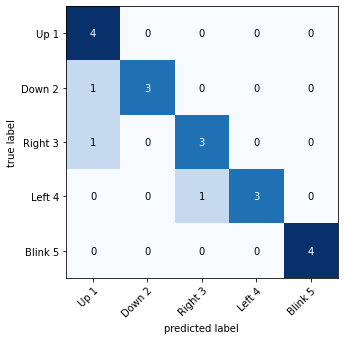

In [34]:
plot_confusion_matrix(conf_mat_knn,class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"],figsize=(12,5)); #fn

# SVM Algorthim

In [395]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf',C = 17)
svm.fit(X_train,y_train)

C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=17)

In [396]:
svm.score(X_train,y_train)

1.0

In [397]:
svm.score(X_test,y_test)

0.8

In [38]:
error = abs(round(svm.score(X_test, y_test) - svm.score(X_train, y_train), 4))
error

0.2

In [39]:
ypred_svm=svm.predict(X_test)

In [40]:
metrics.accuracy_score(y_test,ypred_svm)

0.8

In [41]:
conf_mat_svm = metrics.confusion_matrix (y_test,ypred_svm)

In [42]:
conf_mat_svm

array([[3, 0, 1, 0, 0],
       [0, 3, 0, 1, 0],
       [0, 0, 3, 1, 0],
       [0, 0, 1, 3, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

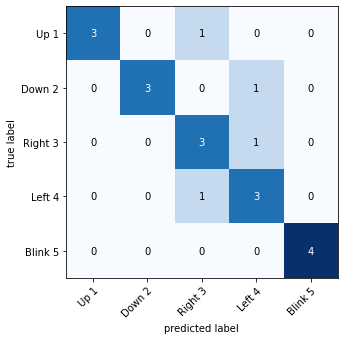

In [43]:
plot_confusion_matrix(conf_mat_svm,class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"],figsize=(12,5)); #fn

# Naive Bayes Algorthim

In [44]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [45]:
nb.predict(X_test)

array([0, 3, 0, 3, 3, 3, 0, 2, 4, 0, 1, 3, 0, 3, 3, 1, 3, 4, 1, 4],
      dtype=int64)

In [46]:
nb.score(X_train,y_train)

0.85

In [47]:
nb.score(X_test,y_test)

0.75

In [48]:
error = abs(round(nb.score(X_test, y_test) - nb.score(X_train, y_train), 2))
error

0.1

In [49]:
 ytest_pred_nb = nb.predict(X_test)

In [50]:
ytrain_pred_nb = nb.predict(X_train)

In [51]:
metrics.accuracy_score(y_test,ytest_pred_nb)

0.75

In [52]:
conf_mat_nb =confusion_matrix(y_test,ytest_pred_nb)
conf_mat_nb

array([[4, 0, 0, 0, 0],
       [0, 3, 0, 1, 0],
       [1, 0, 1, 2, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 1, 3]], dtype=int64)

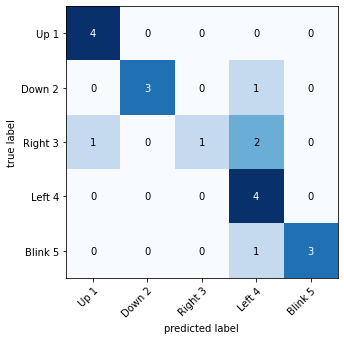

In [53]:
plot_confusion_matrix(conf_mat_nb,class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"],figsize=(12,5)); #fn

# LogisticRegression Model

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
log = LogisticRegression(C = 0.04,max_iter=6000, random_state=40,verbose=1,penalty='none')

In [56]:
log.fit(X_train,y_train)

C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(C=0.04, max_iter=6000, penalty='none', random_state=40,
                   verbose=1)

In [57]:
log.score(X_train,y_train)

1.0

In [58]:
log.score(X_test , y_test)

0.85

In [59]:
error = abs(round(log.score(X_test, y_test) - log.score(X_train, y_train), 2))
error

0.15

In [60]:
ytest_pred_log = log.predict(X_test)

In [61]:
ytrain_pred_log = log.predict(X_train)

In [62]:
metrics.accuracy_score(y_test,ytest_pred_log)

0.85

In [63]:
conf_mat_log =confusion_matrix(y_test,ytest_pred_log)
conf_mat_log

array([[4, 0, 0, 0, 0],
       [0, 3, 0, 1, 0],
       [0, 0, 3, 1, 0],
       [0, 0, 1, 3, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

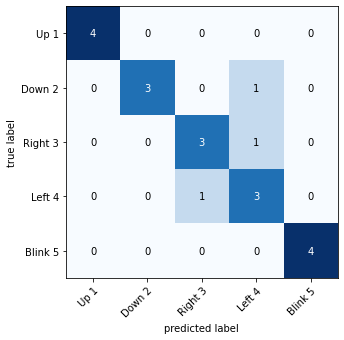

In [64]:
plot_confusion_matrix(conf_mat_log,class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"],figsize=(12,5)); #fn

# AdaBoost Classifier

In [65]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

In [637]:
abc = AdaBoostClassifier(n_estimators=60, learning_rate=0.05,base_estimator=RandomForestClassifier())

In [638]:
abc.fit(X_train,y_train)

C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AHMED\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(), learning_rate=0.05,
                   n_estimators=60)

In [639]:
abc.score(X_train,y_train)

1.0

In [640]:
abc.score(X_test,y_test)

0.9

In [613]:
error = abs(round(abc.score(X_test, y_test) -abc.score(X_train, y_train), 2))
error

0.0

In [614]:
ytest_pred_abc = abc.predict(X_test)

In [615]:
ytrain_pred_abc = abc.predict(X_train)

In [616]:
metrics.accuracy_score(y_test,ytest_pred_abc)

1.0

In [617]:
conf_mat_abc =confusion_matrix(y_test,ytest_pred_abc)
conf_mat_abc

array([[4, 0, 0, 0, 0],
       [0, 4, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 4, 0],
       [0, 0, 0, 0, 4]], dtype=int64)

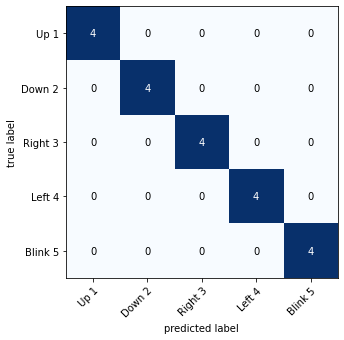

In [618]:
plot_confusion_matrix(conf_mat_abc,class_names=["Up 1","Down 2","Right 3","Left 4", "Blink 5"],figsize=(12,5)); #fn

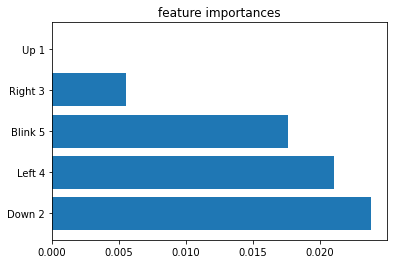

In [619]:
f_importances(abs(abc.feature_importances_), ["Up 1","Down 2","Right 3","Left 4", "Blink 5"], top=5)

In [620]:
pickle.dump(abc, open('abc_psd1.pkl', 'wb'))

In [635]:
abc = pickle.load(open('abc_psd1.pkl', 'rb'))
ytest_pred_abc=abc.predict(X_test)

In [636]:
metrics.accuracy_score(y_test,ytest_pred_abc)

1.0